<a href="https://colab.research.google.com/github/froztedfate/ComputerVision-GoogleColab/blob/main/Labsheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15ECE387 Image Processing and Computer Vision Open Lab
## Labsheet #5
## Image Restoration
Name: VARUN NIVAS VM

Roll Number:AM.EN.U4ECE18167

-----
Natural images are often corrupted by several sources of degradation, which makes them visually unpleasant, or unusable for further processing. Many a times, we may have access to only the degraded version of a true image. An image restoration algorithm targets to compute an **estimate** of the unknown true image from it's degraded observation. A common example of image degradation is noise contamination. A noisy image (image contaminated by noise) shows grains like structures on the image. The task of image restoration algorithm in this case is to **denoise** the image (remove the noise), and produce an estimate of the noiseless image, which is as close as possible to the true image. Another example of image degradation is the lack of adequate resolution. An image that undergoes this degradation will be of poor resolution (**Low Resolution** image), and the task of image restoration algorithm in this case is to estimate the **High Resolution** version of the observed low resolution image. Such image restoration algorithms are called **Super Resolution** algorithms.\
\
Most of the commonly encountered image degradations can be modeled as
$$g(x,y)=H(x,y)\star f(x,y)+n(x,y),$$
where, $g(x,y)$ is the observed degraded image, $f(x,y)$ is the unknown true image, $H(x,y)$ is a 2-D convolution kernel, and, $n(x,y)$ is the noise added to the observed image. The above degradation model assumes that the observed image $g$ is the result of different effects happening on the unknown true image $f$, i.e., first, a convolution by the convolution kernel $H$, second, contamination by the noise $n$. The image restoration algorithm computes an estimate $\hat{f}(x,y)$ of the true unknown image $f(x,y)$ from the degraded observation $g(x,y)$.\
\
In many situations, a 1-D (vector) representation of the 2-D (matrix) image is often desirable for mathematical convenience. The vector representation of a 2-D image (matrix) of size $M\times N$ can be obtained by stacking each of the columns, one on the top of the other. This results in a long column vector of size $MN\times 1$. Using vector representation of images, the above degradation model can be written as,
$$\mathbf{g}=\mathbf{H}\mathbf{f}+\mathbf{n},$$
where, $\mathbf{g}$ and $\mathbf{f}$ denote the vector representations of the degraded and true unknown image respectively, $\mathbf{n}$ denotes the vectorized noise, and, $\mathbf{H}$ is the matrix responsible for convolution (Note that, convolution can be written as a matrix multiplication).
Different types degradations such as noise, poor resolution, blur etc. can be modeled by an appropriate choice of $\mathbf{H}$. The noise vector $\mathbf{n}$ is a random vector which is generally assumed to be Additive White Gaussian Noise (AWGN) of zero mean and variance $\sigma^2$, unless other information is available.

Though the above degradation model can represent a wide variety of degradation sources, we assume that $\mathbf{H}=\mathbf{I}$ in this labsheet, where, $\mathbf{I}$ is the identity matrix. Note that, $\mathbf{g}=\mathbf{f}+\mathbf{n}$, when $\mathbf{H}=\mathbf{I}$. Thus, the degraded observed image $\mathbf{g}$ is a noise contaminated version of the true unknown image $\mathbf{f}$. Hence, the task of image restoration algorithms considered in this labsheet is to remove the noise (denoising) and produce an estimate $\hat{\mathbf{f}}$ of the true unknown image $\mathbf{f}$.

### Simulation of Denoising - Steps
All the denoising algorithms considered in the following exercises follow the below given simulation steps:
1. Load the true image $\mathbf{f}$.
2. Generate the noise $\mathbf{n}$ of type mentioned in the exercise and add it to the true image $\mathbf{f}$ to produce the noisy observation $\mathbf{g}$.
3. Apply the denoising method mentioned in the exercise and recover an estimate $\hat{\mathbf{f}}$ of the true unknown image $\mathbf{f}$.
4. Display the true image and the recovered estimate, and compare them.

You may use the following code snippet for loading the image and adding noise to it. The figure below shows a true noiseless image and the corresponding noisy observation. For all our experiments, the Gaussian noise (AWGN) added to the image has mean zero and standard deviation $25$.

Mounted at /content/gdrive
Orginal Image


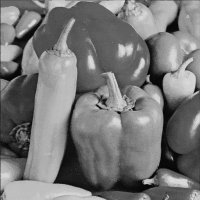

AWGN Noisy Image


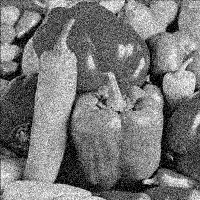

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/gdrive')

f_t = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/peppper.png',0);
f = f_t.astype(np.float64);
sigma = 25;
g = f + np.random.randn(f.shape[0],f.shape[1])*sigma;

up_th = g > 255;
lo_th = g < 0
g[up_th] = 255;
g[lo_th] = 0;
print("Orginal Image")
cv2_imshow(f_t)
print("AWGN Noisy Image")
cv2_imshow(g)

### Exercise 1 - Arithmetic Mean Filter
Arithmetic mean filter computes the pixel value of the denoised image at coordinate $(x,y)$ as the arithmetic mean (average) of group of pixels over a neighborood around $(x,y)$. Let us denote the neighborhood around $(x,y)$ as $S_{xy}$. For example, you may take $S_{xy}$ as the $m\times n$ window around $(x,y)$. Choose $m\times n$ as $3 \times 3$ in your code. Then, the pixel value $\hat{f}(x,y)$ at $(x,y)$ is computed as,
$$\hat{f}(x,y)=\frac{1}{mn}\sum_{r,c\in S_{xy}} g(r,c) $$
Note that, the arithmetic mean filter is exactly same as that of the low pass filter implemented in a previous labsheet. The arithmetic mean filter performs a smoothening on the the noisy pixel values, so that, the noise values are averaged nearly to the mean value zero. However, the true pixel values are also averaged, which causes a blur in the denoised image. This blur destroys the image details such as edges and corners. The figure below shows denoised output produced by the arithmetic mean filter. Write the code for arithmetic mean filter in the following code cell. You may use a neighborhood $S_{xy}$ of size $3 \times 3$. Display the denoised image.

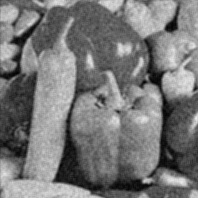

AWGN Noisy Image


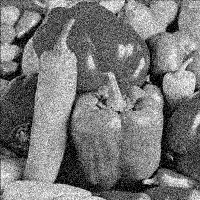

Arithmetic Mean Filter output


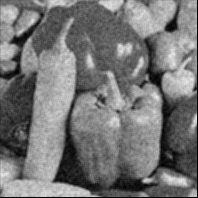

In [ ]:
# Write your code for Arithmetic Mean Filter here..
j=np.zeros((f.shape[0]-2,f.shape[1]-2));
for m in range(1,f.shape[0]-2):

 for n in range(1,f.shape[1]-2):
  slice=g[m-1:m+2,n-1:n+2]
  j[m-1,n-1]=(np.mean(slice))
print("AWGN Noisy Image")
cv2_imshow(g)
print("Arithmetic Mean Filter output")
cv2_imshow(j)


### Exercise 2 - Geometric Mean Filter
The geometric mean filter computes the pixel value at $(x,y)$ of the denoised image $\hat{f}(x,y)$ as,
$$
\hat{f}(x,y) = \left[\prod_{r,c\in S_{x,y}}g(r,c)\right]^{\frac{1}{mn}}
$$
The geometric mean filter also performs a smoothening on the noisy pixel values as in the case of arithmetic mean filter. However, this filter tends to lose less image details, such as, edges and corners, when compared with that of arithmetic mean filter.  The figure below shows the denoised image produced by geometric mean filter. Write the code for geometric mean filter in the following code cell. You may use a neighborhood $S_{xy}$ of size $3 \times 3$. Display the denoised image.

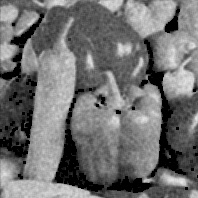

AWGN Noisy Image


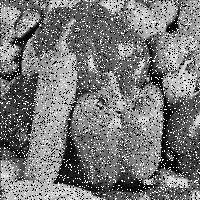

Geometric Mean Filter o/p


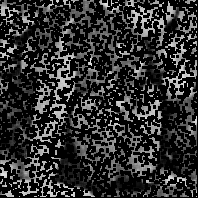

In [ ]:
# Write your code for Geometric Mean Filter here...
f_t = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/peppper.png',0)
f = f_t.astype(np.float64);
j=np.zeros((f.shape[0]-2,f.shape[1]-2));
f=f.astype(np.float64)
for m in range(1,f.shape[0]-2):
 for n in range(1,f.shape[1]-2):
  slice=g[m-1:m+2,n-1:n+2]
  j[m-1,n-1]=np.power(np.prod(slice),(1/9))
print("AWGN Noisy Image")
cv2_imshow(g)
print("Geometric Mean Filter o/p")
cv2_imshow(j)



### Exercise 3 - Adaptive Local Noise Reduction Filter
The arithmetic and geometric mean filters seen above are spatially invariant, i.e., the behavior of the filter does not change at different spatial coordinates of the image. For example, at any spatial coordinate, the arithmetic mean filter always computes the average of pixel values around a neighborhood of fixed size. But, intuitively, we can see that the filter needs to be **aware** of the image contents under the neighborhood, before the averaging process is carried out. For example, if the neighborhood contains important image details such as edges and corners, the averaging should be less aggressive. On the other hand, if the neighborhood contains approximately constant pixel values at all locations, averaging can perfectly remove the noise. **Adaptive Local Noise Reduction Filter** adapts the filter characteristics to the image contents of the neighborhood. This adaptation is carried out based on the statistical properties, i.e., mean and variance of pixel values, of the neighborhood. Let us say, the mean value of pixels from the neighborhood be $\mu_S$, and the variance be $\sigma^2_s$. The adaptive local noise reduction filter computes the pixel value $\hat{f}(x,y)$ at the location $(x,y)$ of the denoised image as,
$$
\hat{f}(x,y) = g(x,y) - \frac{\sigma^2}{\sigma^2_S}\left[g(x,y)-\mu_S\right]
$$
The output of the adaptive local noise reduction filter is shown below. We can observe that, the adaptive filter produces a better denoised image that preserves the important image details, such as, edges and corners. Write the code for adaptive local noise reduction filter in the following code cell. You may use a neighborhood $S_{xy}$ of size $5 \times 5$.

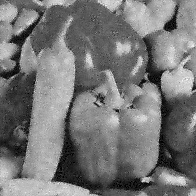

AWGN Noisy Image


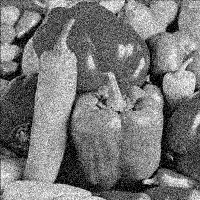

Adaptive Local Noise Reduction Filter output 


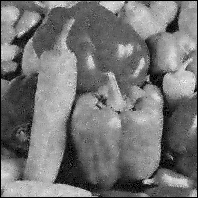

In [ ]:
# Write you code for Adaptive Local Noise Reduction Filter here...
f_t = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/peppper.png',0
);
f = f_t.astype(np.float64);
j=np.zeros((f.shape[0]-2,f.shape[1]-2));
f=f.astype(np.float64)
s1=25*25
for m in range(2,f.shape[0]-2):
 for n in range(2,f.shape[1]-2):
  slice=g[m-2:m+3,n-2:n+3]
  s2=np.var(slice)
  if s2==0:
   s2=0.0001
  j[m-1,n-1]=g[m-1,n-1]-((s1/s2)*(g[m-1,n-1]-np.mean(slice)))
print("AWGN Noisy Image")
cv2_imshow(g)
print("Adaptive Local Noise Reduction Filter output ")
cv2_imshow(j)


### Salt and Pepper Noise
In the above experiments, the noise contaminating the true unknown image was Additive White Gaussian Noise (AWGN). Another type of noise commonly encountered in images is **Salt and Pepper** noise. Salt and Pepper noise is observed when some of the pixel values are stuck at the lowest possible value (black) at certian coordinates of the image regardless of the true pixel value at those coordinates, whereas, some of the pixel values are stuck at highest possible value (white). As the affected pixels are at lowest or highest possible pixel values, they are observed as black and white dots, which resemble salt and pepper thrown on the image. The probabilistic model of Salt and Pepper noise is as follows.
1. The true image pixel value at any $(x,y)$ is replaced by $0$ with probability $P_p$.
2. The true image pixel value at any $(x,y)$ is replaced by $255$ with probability $P_s$.
3. The true image pixel value is unaffected with probability $1-P_p+P_s$

You may use the following code snippet for adding Salt and Pepper noise to a given image with $P_p=0.1$ and $P_s=0.1$.   

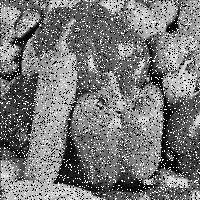

In [ ]:
f_t = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/peppper.png',0);
f = f_t.astype(np.float64);
g = f;
for m in range(0,g.shape[0]):
  for n in range(0,g.shape[1]):
    u = np.random.uniform();
    if (u < 0.1):
      g[m,n] = 0;
    elif (u >= 0.1 and u < 0.2):
      g[m,n] = 255;

cv2_imshow(g); 

### Exercise 4 - Median Filter
The median filter is an order statistic filter which can be used to remove Salt and Pepper noise. The median filter computes the pixel value at any $(x,y)$ of the denoised image as the median of all pixel values from an $m\times n$ neighborhood $S_{xy}$ around $(x,y)$. Note that, the median value is the one that appears in the middle, when all the elements from the neighborhood are listed in the ascending (or descending) order. The figure below shows the denoised image produced by a median filter with $3 \times 3$ neighborhood. Write your code for Median Filter with neighborhood $3 \times 3$ in the following code cell.

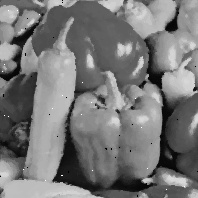

Median Filter Output


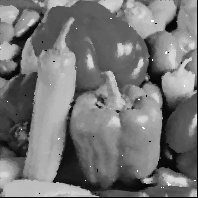

In [ ]:
# Write your code for Median Filter here...
f_t = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/peppper.png',0
);
f = f_t.astype(np.float64);
j=np.zeros((f.shape[0]-2,f.shape[1]-2));
f=f.astype(np.float64)
for m in range(1,f.shape[0]-2):
 for n in range(1,f.shape[1]-2):
  slice=g[m-1:m+2,n-1:n+2]
  j[m-1,n-1]=(np.median(slice))
print("Median Filter Output")
cv2_imshow(j)